In [1]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [3]:
gamma = 5.0
x_vortex, y_vortex = 0.0, 0.0

In [4]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

In [5]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*np.log((X-xv)**2+(Y-yv)**2)
    return psi

In [6]:
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

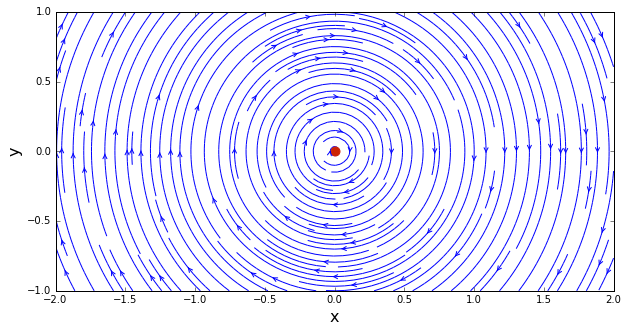

In [7]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [17]:
# vortex & source
strength_source = 1.0           
x_source, y_source = 0.0, 0.0

In [18]:
def get_velocity_source(strength, xs, ys, X, Y):
    u = strength/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u, v

In [19]:
def get_stream_function_source(strength, xs, ys, X, Y):
    psi = strength/(2*math.pi)*np.arctan2((Y-ys), (X-xs))
    return psi

In [20]:
u_source, v_source = get_velocity_source(strength_source, x_source, y_source, X, Y)
psi_source = get_stream_function_source(strength_source, x_source, y_source, X, Y)

In [21]:
u = u_vortex + u_source
v = v_vortex + v_source
psi = psi_vortex + psi_source

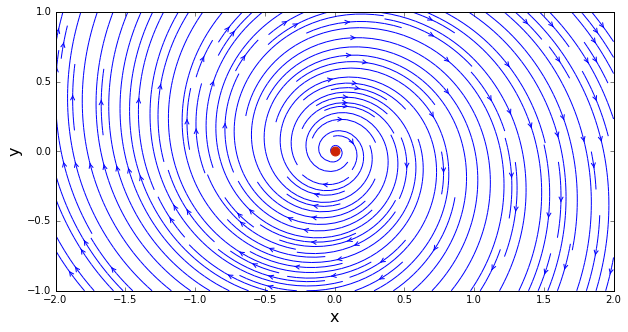

In [22]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');